上課的資料

In [583]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis  import QuadraticDiscriminantAnalysis
from sklearn import neighbors
import numpy as np
# ... Generate simulated data X, y
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt(data_dir + 'la_3.txt', comments='%')
X = D[:, 0:2]
y = D[:,2]
K =100
numneighbor=[15,30]
weights = 'uniform'
Lda_trainingError = np.zeros(K)
Lda_testingError = np.zeros(K)
Qda_trainingError = np.zeros(K)
Qda_testingError = np.zeros(K)
Knn_trainingError=np.zeros(K)
Knn_testingError=np.zeros(K)
Knn1_trainingError=np.zeros(K)
Knn1_testingError=np.zeros(K)
Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Knn = neighbors.KNeighborsClassifier(numneighbor[0], weights = weights)
Knn1 = neighbors.KNeighborsClassifier(numneighbor[1], weights = weights)
for i in range(K) :        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        Lda.fit(X_train, y_train)
        Lda_trainingError[i] = 1-Lda.score(X_train,y_train)
        Lda_testingError[i] =1-Lda.score(X_test,y_test) 
        # print('LDA training Error:{:.4f}'.format(Lda_trainingError[i])) 
        # print('LDA testing Error:{:.4f}'.format(Lda_testingError[i]))   
        Qda.fit(X_train, y_train)
        Qda_trainingError[i] = 1-Qda.score(X_train,y_train)
        Qda_testingError[i] =1-Qda.score(X_test,y_test) 
        Knn.fit(X_train, y_train)
        Knn_trainingError[i] = 1-Knn.score(X_train,y_train)
        Knn_testingError[i] =1-Knn.score(X_test,y_test) 
        Knn1.fit(X_train, y_train)
        Knn1_trainingError[i] = 1-Knn1.score(X_train,y_train)
        Knn1_testingError[i] =1-Knn1.score(X_test,y_test) 
print('LDA mean testing Error:{:.4f}'.format(Lda_testingError.mean()))        
print('LDA mean training Error:{:.4f}'.format(Lda_trainingError.mean()))
print('QDA mean testing Error:{:.4f}'.format(Qda_testingError.mean()))        
print('QDA mean training Error:{:.4f}'.format(Qda_trainingError.mean()))
print('Knn(n=15) mean testing Error:{:.4f}'.format(Knn_testingError.mean()))  
print('Knn(n=15) mean training Error:{:.4f}'.format(Knn_trainingError.mean()))  
print('Knn(n=30) mean testing Error:{:.4f}'.format(Knn1_testingError.mean()))        
print('Knn(n=30) mean training Error:{:.4f}'.format(Knn1_trainingError.mean()))

LDA mean testing Error:0.2890
LDA mean training Error:0.2664
QDA mean testing Error:0.2940
QDA mean training Error:0.2733
Knn(n=15) mean testing Error:0.1925
Knn(n=15) mean training Error:0.1711
Knn(n=30) mean testing Error:0.2142
Knn(n=30) mean training Error:0.1925


### 為分割資料前的分界線 ###

Training error for LDA =0.2700
Training error for QDA =0.2850


/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_32340/1886326234.py:36: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap = cmap)


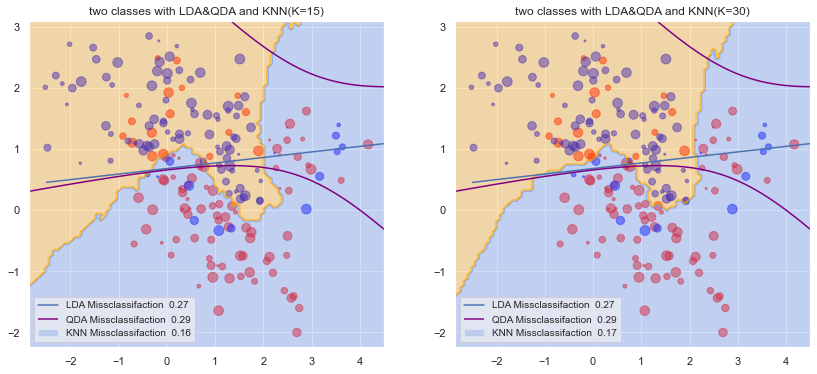

In [582]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt(data_dir + 'la_3.txt', comments='%')
X = D[:, 0:2]
y = D[:,2]
fig,ax=plt.subplots(1,2,figsize=(14,6),squeeze=False)
area=2*np.random.randint(50,size=D[:,0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
ax[0][0].scatter(D[:, 0], D[:, 1], c = grp_color, s = area,alpha = 0.5, marker = 'o' )#area代表點的的小
ax[0][1].scatter(D[:, 0], D[:, 1], c = grp_color, s = area,alpha = 0.5, marker = 'o' )
#draw LDA
Lda=LinearDiscriminantAnalysis()
Lda.fit(X,y)
trainErrLDA=1-Lda.score(X,y)
print('Training error for LDA ={:.4f}'.format(trainErrLDA))
nx,ny=100,100
x_min,x_max=plt.xlim()
y_min,y_max=plt.ylim()
x_=np.linspace(x_min,x_max,nx)
y_=np.linspace(y_min,y_max,ny)
xx,yy=np.meshgrid(x_,y_)
Z0=Lda.predict_proba(np.c_[xx.ravel(),yy.ravel()])#算出後驗機率
Z0=Z0[:,1].reshape(xx.shape)
# Define pseudo colors#畫地板
cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = colors.LinearSegmentedColormap('red_blue_classes', cdit)
# ax[0][0].pcolormesh(xx,yy,Z0,cmap=cmap,shading='auto',zorder=0)
# ax[0][1].pcolormesh(xx,yy,Z0,cmap=cmap,shading='auto',zorder=0)
plt.cm.register_cmap(cmap = cmap)
C1, C2 = X[y==0,:], X[y==1,:]
n = D[:,0].size
n1, n2 = C1[:,0].size, C2[:,0].size
pi1, pi2 = n1/n, n2/n
mu1, mu2 = np.mean(C1, axis = 0), np.mean(C2, axis = 0)
Sigma = (np.cov(C1.T) + np.cov(C2.T))/2
# draw classification line of LDA
K = np.log(pi1/pi2) - 0.5 * (mu1 + mu2)  @ LA.inv(Sigma) @ (mu1 - mu2).T
L = LA.inv(Sigma) @ (mu1 - mu2).T
f = lambda x : -L[0]/L[1] * x - K/L[1]
x = np.linspace(-2.5, 4.5, 10)
b=ax[0][0].plot(x, f(x))
b=ax[0][1].plot(x, f(x))
#draw QDA
Qda = QuadraticDiscriminantAnalysis( tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
trainErrQDA=1-Qda.score(X,y)
print('Training error for QDA ={:.4f}'.format(trainErrQDA))
Z2 = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2[:, 1].reshape(xx.shape)
# Define pseudo colors
contoursQDA= ax[0][0].contour(xx, yy, Z2, [0.5],colors = 'purple')
contoursQDA1= ax[0][1].contour(xx, yy, Z2, [0.5],colors = 'purple')
#draw KNN
K = [15,30]
weights = 'uniform'
Knn = neighbors.KNeighborsClassifier(K[0], weights = weights)
Knn1 = neighbors.KNeighborsClassifier(K[1], weights = weights)
Knn.fit(X, y)
Knn1.fit(X, y)
trainingErrKNN = 1 - Knn.score(X, y)
trainingErrKNN1 = 1 - Knn1.score(X, y)
z1 = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
z10 = Knn1.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = z1.reshape(xx.shape)
Z10=z10.reshape(xx.shape)
cmap_light =colors.ListedColormap(['cornflowerblue', 'orange'])
contoursKNN=ax[0][0].contourf(xx, yy, Z1,cmap = cmap_light, alpha = 0.3)
contoursKNN1=ax[0][1].contourf(xx, yy, Z10, cmap = cmap_light, alpha = 0.3)
h2,_=contoursQDA.legend_elements()
h3,_=contoursKNN.legend_elements()
h22,_=contoursQDA1.legend_elements()
h33,_=contoursKNN1.legend_elements()
ax[0][0].legend([b[0],h2[0],h3[0]],['LDA Missclassifaction  {:.2f}'.format(trainErrLDA),'QDA Missclassifaction  {:.2f}'.format(trainErrQDA),'KNN Missclassifaction  {:.2f}'.format(trainingErrKNN)],fontsize=10)
ax[0][1].legend([b[0],h22[0],h33[0]],['LDA Missclassifaction  {:.2f}'.format(trainErrLDA),'QDA Missclassifaction  {:.2f}'.format(trainErrQDA),'KNN Missclassifaction  {:.2f}'.format(trainingErrKNN1)],fontsize=10)
ax[0][0].set_title("two classes with LDA&QDA and KNN(K=15)")
ax[0][1].set_title("two classes with LDA&QDA and KNN(K=30)")
plt.savefig('/Users/liang/Documents/統計數學與運算/images/hw5classdata.pdf',format='pdf')

### 生成資料的例子1(比較中心距離近) ###

In [538]:
from scipy import stats as stat
def genmnlrvs(n1,n2,m1,m2,Cov1,Cov2): #生成資料的函數
    mvn1=stat.multivariate_normal(mean=m1,cov=Cov1)
    mvn2=stat.multivariate_normal(mean=m2,cov=Cov2)
    A,B=mvn1.rvs(n1),mvn2.rvs(n2)
    X=np.vstack((A,B))
    y=np.hstack((np.zeros(n1),np.ones(n2)))
    return X,y

In [549]:
n1,n2=100,100
m1, m2 = np.array([0, 0]), np.array([0.5, 0.5])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0], [0, 1]])
X,y=genmnlrvs(n1,n2,m1,m2,Cov1,Cov2)
np.savetxt('hw5_data1.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y')

畫分界線

Training error for QDA =0.3900


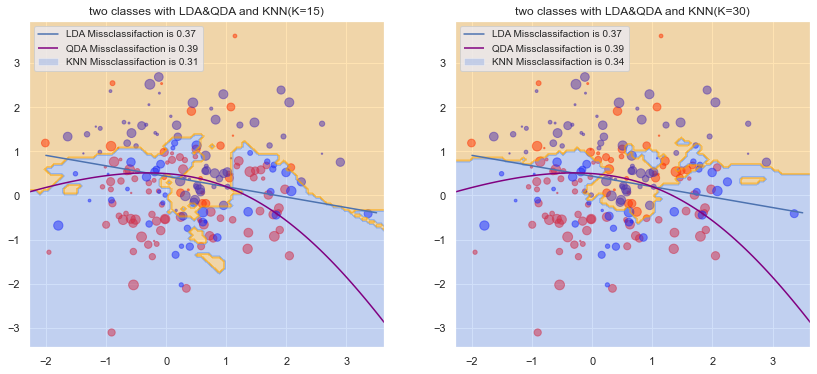

In [584]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt( '/Users/liang/Documents/統計數學與運算/homeworks/hw5_data1.txt')
X = D[:, 0:2]
y = D[:,2]
fig,ax=plt.subplots(1,2,figsize=(14,6),squeeze=False)
area=2*np.random.randint(50,size=D[:,0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
ax[0][0].scatter(D[:, 0], D[:, 1], c = grp_color, s = area,alpha = 0.5, marker = 'o' )#area代表點的的小
ax[0][1].scatter(D[:, 0], D[:, 1], c = grp_color, s = area,alpha = 0.5, marker = 'o' )
#draw LDA
Lda=LinearDiscriminantAnalysis()
Lda.fit(X,y)
trainErrLDA=1-Lda.score(X,y)
# print('Training error for LDA ={:.4f}'.format(trainErrLDA))
nx,ny=100,100
x_min,x_max=plt.xlim()
y_min,y_max=plt.ylim()
x_=np.linspace(x_min,x_max,nx)
y_=np.linspace(y_min,y_max,ny)
xx,yy=np.meshgrid(x_,y_)
Z0=Lda.predict_proba(np.c_[xx.ravel(),yy.ravel()])#算出後驗機率
Z0=Z0[:,1].reshape(xx.shape)
C1, C2 = X[y==0,:], X[y==1,:]
n = D[:,0].size
n1, n2 = C1[:,0].size, C2[:,0].size
pi1, pi2 = n1/n, n2/n
mu1, mu2 = np.mean(C1, axis = 0), np.mean(C2, axis = 0)
Sigma = (np.cov(C1.T) + np.cov(C2.T))/2
#draw classification line of LDA
K = np.log(pi1/pi2) - 0.5 * (mu1 + mu2)  @ LA.inv(Sigma) @ (mu1 - mu2).T
L = LA.inv(Sigma) @ (mu1 - mu2).T
f = lambda x : -L[0]/L[1] * x - K/L[1]
x = np.linspace(-2, 3.5, 10)
b=ax[0][0].plot(x, f(x))
b=ax[0][1].plot(x, f(x))
#draw QDA
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
trainErrQDA=1-Qda.score(X,y)
print('Training error for QDA ={:.4f}'.format(trainErrQDA))
Z2 = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2[:, 1].reshape(xx.shape)
contoursQDA=ax[0][0].contour(xx, yy, Z2, [0.5],colors = 'purple')
contoursQDA1=ax[0][1].contour(xx, yy, Z2, [0.5],colors = 'purple')
#draw KNN
K = [15,30]
weights = 'uniform'
Knn = neighbors.KNeighborsClassifier(K[0], weights = weights)
Knn1 = neighbors.KNeighborsClassifier(K[1], weights = weights)
Knn.fit(X, y),Knn1.fit(X, y)
trainingErrKNN = 1 - Knn.score(X, y)
trainingErrKNN1= 1 - Knn1.score(X, y)
z1 = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
z10 = Knn1.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = z1.reshape(xx.shape)
Z10 = z10.reshape(xx.shape)
cmap_light =colors.ListedColormap(['cornflowerblue', 'orange'])#畫地板
contoursKNN=ax[0][0].contourf(xx, yy, Z1, cmap = cmap_light, alpha = 0.3)
contoursKNN1=ax[0][1].contourf(xx, yy, Z10, cmap = cmap_light, alpha = 0.3)
h2,_=contoursQDA.legend_elements()
h3,_=contoursKNN.legend_elements()
h22,_=contoursQDA1.legend_elements()
h33,_=contoursKNN1.legend_elements()
ax[0][0].legend([b[0],h2[0],h3[0]],['LDA Missclassifaction is {:.2f}'.format(trainErrLDA),'QDA Missclassifaction is {:.2f}'.format(trainErrQDA),'KNN Missclassifaction is {:.2f}'.format(trainingErrKNN)],fontsize=10)
ax[0][1].legend([b[0],h22[0],h33[0]],['LDA Missclassifaction is {:.2f}'.format(trainErrLDA),'QDA Missclassifaction is {:.2f}'.format(trainErrQDA),'KNN Missclassifaction is {:.2f}'.format(trainingErrKNN1)],fontsize=10)
ax[0][0].set_title("two classes with LDA&QDA and KNN(K=15)")
ax[0][1].set_title("two classes with LDA&QDA and KNN(K=30)")
plt.savefig('/Users/liang/Documents/統計數學與運算/images/hw5gene1.pdf',format='pdf')

In [586]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis  import QuadraticDiscriminantAnalysis
from sklearn import neighbors
import numpy as np
# ... Generate simulated data X, y
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt( '/Users/liang/Documents/統計數學與運算/homeworks/hw5_data1.txt')
X = D[:, 0:2]
y = D[:,2]
K =100
numneighbor=[15,30]
weights = 'uniform'
Lda_trainingError = np.zeros(K)
Lda_testingError = np.zeros(K)
Qda_trainingError = np.zeros(K)
Qda_testingError = np.zeros(K)
Knn_trainingError=np.zeros(K)
Knn_testingError=np.zeros(K)
Knn1_trainingError=np.zeros(K)
Knn1_testingError=np.zeros(K)
Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Knn = neighbors.KNeighborsClassifier(numneighbor[0], weights = weights)
Knn1 = neighbors.KNeighborsClassifier(numneighbor[1], weights = weights)  
for i in range(K) :        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        Lda.fit(X_train, y_train)
        Lda_trainingError[i] = 1-Lda.score(X_train,y_train)
        Lda_testingError[i] =1-Lda.score(X_test,y_test) 
        # print('LDA training Error:{:.4f}'.format(Lda_trainingError[i])) 
        # print('LDA testing Error:{:.4f}'.format(Lda_testingError[i]))   
        Qda.fit(X_train, y_train)
        Qda_trainingError[i] = 1-Qda.score(X_train,y_train)
        Qda_testingError[i] =1-Qda.score(X_test,y_test) 
        Knn.fit(X_train, y_train)
        Knn_trainingError[i] = 1-Knn.score(X_train,y_train)
        Knn_testingError[i] =1-Knn.score(X_test,y_test) 
        Knn1.fit(X_train, y_train)
        Knn1_trainingError[i] = 1-Knn1.score(X_train,y_train)
        Knn1_testingError[i] =1-Knn1.score(X_test,y_test) 
print('LDA mean testing Error:{:.4f}'.format(Lda_testingError.mean()))        
print('LDA mean training Error:{:.4f}'.format(Lda_trainingError.mean()))
print('QDA mean testing Error:{:.4f}'.format(Qda_testingError.mean()))        
print('QDA mean training Error:{:.4f}'.format(Qda_trainingError.mean()))
print('Knn(n=15) mean testing Error:{:.4f}'.format(Knn_testingError.mean()))        
print('Knn(n=15) mean training Error:{:.4f}'.format(Knn_trainingError.mean()))
print('Knn(n=30) mean testing Error:{:.4f}'.format(Knn1_testingError.mean()))        
print('Knn(n=30) mean training Error:{:.4f}'.format(Knn1_trainingError.mean()))

LDA mean testing Error:0.4073
LDA mean training Error:0.3724
QDA mean testing Error:0.4140
QDA mean training Error:0.3792
Knn(n=15) mean testing Error:0.3700
Knn(n=15) mean training Error:0.3084
Knn(n=30) mean testing Error:0.4095
Knn(n=30) mean training Error:0.3609


### 生成資料的例子1(比較中心距離遠) ###

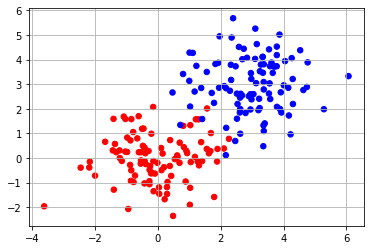

In [542]:
n1,n2=100,100
m1, m2 = np.array([0,0]), np.array([3,3])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0], [0, 1]])
X,y=genmnlrvs(n1,n2,m1,m2,Cov1,Cov2)
np.savetxt('hw5_data110.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y')
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
plt.grid(True)
plt.show()

Training error for QDA =0.0200


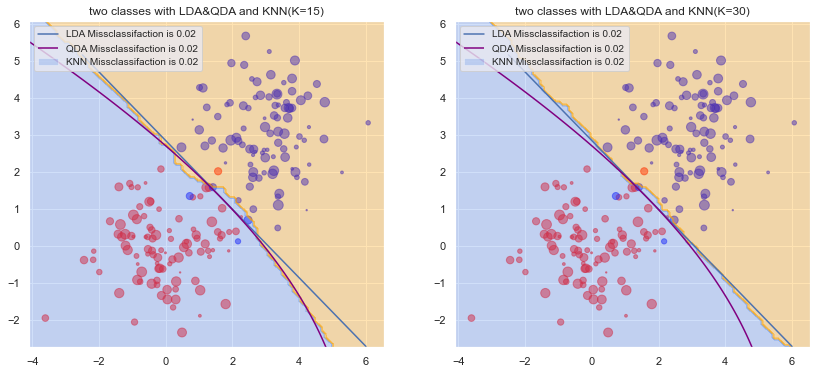

In [587]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt( '/Users/liang/Documents/統計數學與運算/homeworks/hw5_data110.txt')
X = D[:, 0:2]
y = D[:,2]
fig,ax=plt.subplots(1,2,figsize=(14,6),squeeze=False)
area=2*np.random.randint(50,size=D[:,0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
ax[0][0].scatter(D[:, 0], D[:, 1], c = grp_color, s = area,alpha = 0.5, marker = 'o' )#area代表點的的小
ax[0][1].scatter(D[:, 0], D[:, 1], c = grp_color, s = area,alpha = 0.5, marker = 'o' )
#draw LDA
Lda=LinearDiscriminantAnalysis()
Lda.fit(X,y)
trainErrLDA=1-Lda.score(X,y)
# print('Training error for LDA ={:.4f}'.format(trainErrLDA))
nx,ny=100,100
x_min,x_max=plt.xlim()
y_min,y_max=plt.ylim()
x_=np.linspace(x_min,x_max,nx)
y_=np.linspace(y_min,y_max,ny)
xx,yy=np.meshgrid(x_,y_)
Z0=Lda.predict_proba(np.c_[xx.ravel(),yy.ravel()])#算出後驗機率
Z0=Z0[:,1].reshape(xx.shape)
C1, C2 = X[y==0,:], X[y==1,:]
n = D[:,0].size
n1, n2 = C1[:,0].size, C2[:,0].size
pi1, pi2 = n1/n, n2/n
mu1, mu2 = np.mean(C1, axis = 0), np.mean(C2, axis = 0)
Sigma = (np.cov(C1.T) + np.cov(C2.T))/2
#draw classification line of LDA
K = np.log(pi1/pi2) - 0.5 * (mu1 + mu2)  @ LA.inv(Sigma) @ (mu1 - mu2).T
L = LA.inv(Sigma) @ (mu1 - mu2).T
f = lambda x : -L[0]/L[1] * x - K/L[1]
x = np.linspace(-2.5, 6, 10)
b=ax[0][0].plot(x, f(x))
b=ax[0][1].plot(x, f(x))
#draw QDA
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
trainErrQDA=1-Qda.score(X,y)
print('Training error for QDA ={:.4f}'.format(trainErrQDA))
Z2 = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2[:, 1].reshape(xx.shape)
contoursQDA=ax[0][0].contour(xx, yy, Z2, [0.5],colors = 'purple')
contoursQDA1=ax[0][1].contour(xx, yy, Z2, [0.5],colors = 'purple')
#draw KNN
K = [15,30]
weights = 'uniform'
Knn = neighbors.KNeighborsClassifier(K[0], weights = weights)
Knn1 = neighbors.KNeighborsClassifier(K[1], weights = weights)
Knn.fit(X, y),Knn1.fit(X, y)
trainingErrKNN = 1 - Knn.score(X, y)
trainingErrKNN1= 1 - Knn1.score(X, y)
z1 = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
z10 = Knn1.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = z1.reshape(xx.shape)
Z10 = z10.reshape(xx.shape)
cmap_light =colors.ListedColormap(['cornflowerblue', 'orange'])#畫地板
contoursKNN=ax[0][0].contourf(xx, yy, Z1, cmap = cmap_light, alpha = 0.3)
contoursKNN1=ax[0][1].contourf(xx, yy, Z10, cmap = cmap_light, alpha = 0.3)
h2,_=contoursQDA.legend_elements()
h3,_=contoursKNN.legend_elements()
h22,_=contoursQDA1.legend_elements()
h33,_=contoursKNN1.legend_elements()
ax[0][0].legend([b[0],h2[0],h3[0]],['LDA Missclassifaction is {:.2f}'.format(trainErrLDA),'QDA Missclassifaction is {:.2f}'.format(trainErrQDA),'KNN Missclassifaction is {:.2f}'.format(trainingErrKNN)],fontsize=10)
ax[0][1].legend([b[0],h22[0],h33[0]],['LDA Missclassifaction is {:.2f}'.format(trainErrLDA),'QDA Missclassifaction is {:.2f}'.format(trainErrQDA),'KNN Missclassifaction is {:.2f}'.format(trainingErrKNN1)],fontsize=10)
ax[0][0].set_title("two classes with LDA&QDA and KNN(K=15)")
ax[0][1].set_title("two classes with LDA&QDA and KNN(K=30)")
plt.savefig('/Users/liang/Documents/統計數學與運算/images/hw5gene110.pdf',format='pdf')

In [588]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis  import QuadraticDiscriminantAnalysis
from sklearn import neighbors
import numpy as np
# ... Generate simulated data X, y
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt( '/Users/liang/Documents/統計數學與運算/homeworks/hw5_data110.txt')
X = D[:, 0:2]
y = D[:,2]
K =100
numneighbor=[15,30]
weights = 'uniform'
Lda_trainingError = np.zeros(K)
Lda_testingError = np.zeros(K)
Qda_trainingError = np.zeros(K)
Qda_testingError = np.zeros(K)
Knn_trainingError=np.zeros(K)
Knn_testingError=np.zeros(K)
Knn1_trainingError=np.zeros(K)
Knn1_testingError=np.zeros(K)
Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Knn = neighbors.KNeighborsClassifier(numneighbor[0], weights = weights)
Knn1 = neighbors.KNeighborsClassifier(numneighbor[1], weights = weights)  
for i in range(K) :        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        Lda.fit(X_train, y_train)
        Lda_trainingError[i] = 1-Lda.score(X_train,y_train)
        Lda_testingError[i] =1-Lda.score(X_test,y_test) 
        # print('LDA training Error:{:.4f}'.format(Lda_trainingError[i])) 
        # print('LDA testing Error:{:.4f}'.format(Lda_testingError[i]))   
        Qda.fit(X_train, y_train)
        Qda_trainingError[i] = 1-Qda.score(X_train,y_train)
        Qda_testingError[i] =1-Qda.score(X_test,y_test) 
        Knn.fit(X_train, y_train)
        Knn_trainingError[i] = 1-Knn.score(X_train,y_train)
        Knn_testingError[i] =1-Knn.score(X_test,y_test) 
        Knn1.fit(X_train, y_train)
        Knn1_trainingError[i] = 1-Knn1.score(X_train,y_train)
        Knn1_testingError[i] =1-Knn1.score(X_test,y_test) 
print('LDA mean testing Error:{:.4f}'.format(Lda_testingError.mean()))        
print('LDA mean training Error:{:.4f}'.format(Lda_trainingError.mean()))
print('QDA mean testing Error:{:.4f}'.format(Qda_testingError.mean()))        
print('QDA mean training Error:{:.4f}'.format(Qda_trainingError.mean()))
print('Knn(n=15) mean testing Error:{:.4f}'.format(Knn_testingError.mean()))        
print('Knn(n=15) mean training Error:{:.4f}'.format(Knn_trainingError.mean()))
print('Knn(n=30) mean testing Error:{:.4f}'.format(Knn1_testingError.mean()))        
print('Knn(n=30) mean training Error:{:.4f}'.format(Knn1_trainingError.mean()))

LDA mean testing Error:0.0235
LDA mean training Error:0.0199
QDA mean testing Error:0.0268
QDA mean training Error:0.0205
Knn(n=15) mean testing Error:0.0303
Knn(n=15) mean training Error:0.0255
Knn(n=30) mean testing Error:0.0253
Knn(n=30) mean training Error:0.0230


### 生成的資料2(大樣本數的不同) ###

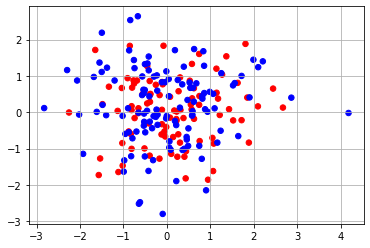

In [447]:
n1 , n2 = 100 , 120
m1 , m2 = [0,0] , [0,0]
Cov1=[[1,0],[0,1]]
Cov2=[[1,0],[0,1]]   
X,y=genmnlrvs(n1,n2,m1,m2,Cov1,Cov2)
np.savetxt('hw5_data2.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y') 
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
plt.grid(True)
plt.show()

Training error for LDA =0.4636
Training error for QDA =0.4773


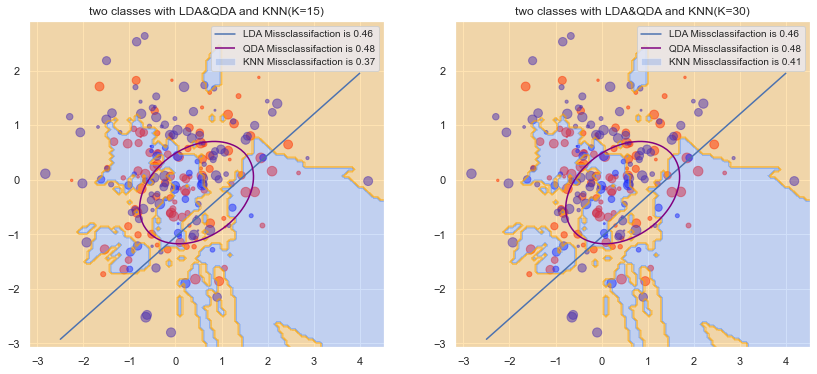

In [595]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
D = np.loadtxt( '/Users/liang/Documents/統計數學與運算/homeworks/hw5_data2.txt')
X = D[:, 0:2]
y = D[:,2]
fig,ax=plt.subplots(1,2,figsize=(14,6),squeeze=False)
area=2*np.random.randint(50,size=D[:,0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
ax[0][0].scatter(D[:, 0], D[:, 1], c = grp_color, s = area,alpha = 0.5, marker = 'o' )#area代表點的的小
ax[0][1].scatter(D[:, 0], D[:, 1], c = grp_color, s = area,alpha = 0.5, marker = 'o' )
#draw LDA
Lda=LinearDiscriminantAnalysis()
Lda.fit(X,y)
trainErrLDA=1-Lda.score(X,y)
print('Training error for LDA ={:.4f}'.format(trainErrLDA))
nx,ny=100,100
x_min,x_max=plt.xlim()
y_min,y_max=plt.ylim()
x_=np.linspace(x_min,x_max,nx)
y_=np.linspace(y_min,y_max,ny)
xx,yy=np.meshgrid(x_,y_)
Z0=Lda.predict_proba(np.c_[xx.ravel(),yy.ravel()])#算出後驗機率
Z0=Z0[:,1].reshape(xx.shape)
# Define pseudo colors#畫地板
C1, C2 = X[y==0,:], X[y==1,:]
n = D[:,0].size
n1, n2 = C1[:,0].size, C2[:,0].size
pi1, pi2 = n1/n, n2/n
mu1, mu2 = np.mean(C1, axis = 0), np.mean(C2, axis = 0)
Sigma = (np.cov(C1.T) + np.cov(C2.T))/2
#draw classification line of LDA
K = np.log(pi1/pi2) - 0.5 * (mu1 + mu2)  @ LA.inv(Sigma) @ (mu1 - mu2).T
L = LA.inv(Sigma) @ (mu1 - mu2).T
f = lambda x : -L[0]/L[1] * x - K/L[1]
x = np.linspace(-2.5, 4, 10)
b=ax[0][0].plot(x, f(x))
b=ax[0][1].plot(x, f(x))
#draw QDA
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
trainErrQDA=1-Qda.score(X,y)
print('Training error for QDA ={:.4f}'.format(trainErrQDA))
Z2 = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2[:, 1].reshape(xx.shape)
contoursQDA= ax[0][0].contour(xx, yy, Z2, [0.5],colors = 'purple')
contoursQDA= ax[0][1].contour(xx, yy, Z2, [0.5],colors = 'purple')
#draw KNN
K = [15,30]
weights = 'uniform'
Knn = neighbors.KNeighborsClassifier(K[0], weights = weights)
Knn1 = neighbors.KNeighborsClassifier(K[1], weights = weights)
Knn.fit(X, y)
Knn1.fit(X, y)
trainingErrKNN = 1 - Knn.score(X, y)
trainingErrKNN1 = 1 - Knn1.score(X, y)
z1 = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
z11 = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = z1.reshape(xx.shape)
Z11 = z11.reshape(xx.shape)
cmap_light =colors.ListedColormap(['cornflowerblue', 'orange'])
contoursKNN=ax[0][0].contourf(xx, yy, Z1, cmap = cmap_light, alpha = 0.3)
contoursKNN1=ax[0][1].contourf(xx, yy, Z11, cmap = cmap_light, alpha = 0.3)
# h1,_=contoursLDA.legend_elements()
h2,_=contoursQDA.legend_elements()
h3,_=contoursKNN.legend_elements()
# h11,_=contoursLDA.legend_elements()
h22,_=contoursQDA.legend_elements()
h33,_=contoursKNN1.legend_elements()
ax[0][0].legend([b[0],h2[0],h3[0]],['LDA Missclassifaction is {:.2f}'.format(trainErrLDA),'QDA Missclassifaction is {:.2f}'.format(trainErrQDA),'KNN Missclassifaction is {:.2f}'.format(trainingErrKNN)],fontsize=10)
ax[0][1].legend([b[0],h22[0],h33[0]],['LDA Missclassifaction is {:.2f}'.format(trainErrLDA),'QDA Missclassifaction is {:.2f}'.format(trainErrQDA),'KNN Missclassifaction is {:.2f}'.format(trainingErrKNN1)],fontsize=10)
ax[0][0].set_title("two classes with LDA&QDA and KNN(K=15)")
ax[0][1].set_title("two classes with LDA&QDA and KNN(K=30)")
plt.savefig('/Users/liang/Documents/統計數學與運算/images/hw5gene200.pdf',format='pdf')

In [596]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis  import QuadraticDiscriminantAnalysis
from sklearn import neighbors
import numpy as np
# ... Generate simulated data X, y
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt( '/Users/liang/Documents/統計數學與運算/homeworks/hw5_data2.txt')
X = D[:, 0:2]
y = D[:,2]
K =100
numneighbor=[15,30]
weights = 'uniform'
Lda_trainingError = np.zeros(K)
Lda_testingError = np.zeros(K)
Qda_trainingError = np.zeros(K)
Qda_testingError = np.zeros(K)
Knn_trainingError=np.zeros(K)
Knn_testingError=np.zeros(K)
Knn1_trainingError=np.zeros(K)
Knn1_testingError=np.zeros(K)
Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Knn = neighbors.KNeighborsClassifier(numneighbor[0], weights = weights)
Knn1 = neighbors.KNeighborsClassifier(numneighbor[1], weights = weights)  
for i in range(K) :        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        Lda.fit(X_train, y_train)
        Lda_trainingError[i] = 1-Lda.score(X_train,y_train)
        Lda_testingError[i] =1-Lda.score(X_test,y_test) 
        # print('LDA training Error:{:.4f}'.format(Lda_trainingError[i])) 
        # print('LDA testing Error:{:.4f}'.format(Lda_testingError[i]))   
        Qda.fit(X_train, y_train)
        Qda_trainingError[i] = 1-Qda.score(X_train,y_train)
        Qda_testingError[i] =1-Qda.score(X_test,y_test) 
        Knn.fit(X_train, y_train)
        Knn_trainingError[i] = 1-Knn.score(X_train,y_train)
        Knn_testingError[i] =1-Knn.score(X_test,y_test) 
        Knn1.fit(X_train, y_train)
        Knn1_trainingError[i] = 1-Knn1.score(X_train,y_train)
        Knn1_testingError[i] =1-Knn1.score(X_test,y_test) 
print('LDA mean testing Error:{:.4f}'.format(Lda_testingError.mean()))        
print('LDA mean training Error:{:.4f}'.format(Lda_trainingError.mean()))
print('QDA mean testing Error:{:.4f}'.format(Qda_testingError.mean()))        
print('QDA mean training Error:{:.4f}'.format(Qda_trainingError.mean()))
print('Knn(n=15) mean testing Error:{:.4f}'.format(Knn_testingError.mean()))        
print('Knn(n=15) mean training Error:{:.4f}'.format(Knn_trainingError.mean()))
print('Knn(n=30) mean testing Error:{:.4f}'.format(Knn1_testingError.mean()))        
print('Knn(n=30) mean training Error:{:.4f}'.format(Knn1_trainingError.mean()))

LDA mean testing Error:0.4966
LDA mean training Error:0.4549
QDA mean testing Error:0.5141
QDA mean training Error:0.4490
Knn(n=15) mean testing Error:0.5336
Knn(n=15) mean training Error:0.3986
Knn(n=30) mean testing Error:0.5389
Knn(n=30) mean training Error:0.4434


### 生成的資料2(小樣本數的不同) ###

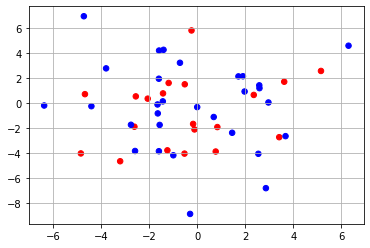

In [451]:
n1 , n2 = 20 , 30
m1 , m2 = [0,0] , [0,0]
Cov1=[[10,0],[0,10]]
Cov2=[[10,0],[0,10]]   
X,y=genmnlrvs(n1,n2,m1,m2,Cov1,Cov2)
np.savetxt('hw5_data220.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y') 
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
plt.grid(True)
plt.show()

Training error for LDA =0.4000
Training error for QDA =0.4000


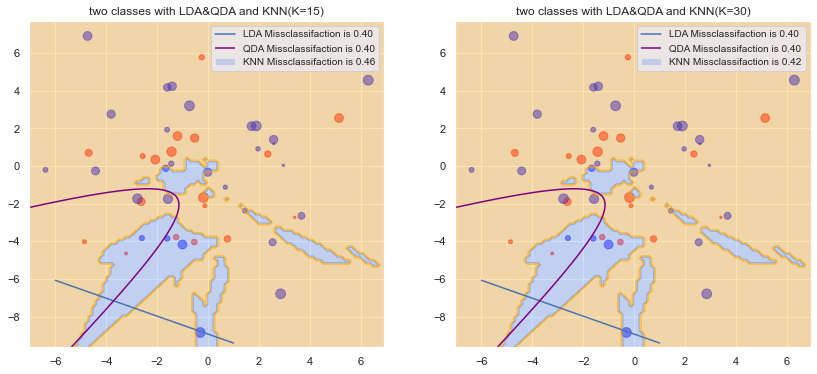

In [597]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as LA
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
D = np.loadtxt( '/Users/liang/Documents/統計數學與運算/homeworks/hw5_data220.txt')
X = D[:, 0:2]
y = D[:,2]
fig,ax=plt.subplots(1,2,figsize=(14,6),squeeze=False)
area=2*np.random.randint(50,size=D[:,0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
ax[0][0].scatter(D[:, 0], D[:, 1], c = grp_color, s = area,alpha = 0.5, marker = 'o' )#area代表點的的小
ax[0][1].scatter(D[:, 0], D[:, 1], c = grp_color, s = area,alpha = 0.5, marker = 'o' )
#draw LDA
Lda=LinearDiscriminantAnalysis()
Lda.fit(X,y)
trainErrLDA=1-Lda.score(X,y)
print('Training error for LDA ={:.4f}'.format(trainErrLDA))
nx,ny=100,100
x_min,x_max=plt.xlim()
y_min,y_max=plt.ylim()
x_=np.linspace(x_min,x_max,nx)
y_=np.linspace(y_min,y_max,ny)
xx,yy=np.meshgrid(x_,y_)
Z0=Lda.predict_proba(np.c_[xx.ravel(),yy.ravel()])#算出後驗機率
Z0=Z0[:,1].reshape(xx.shape)
# Define pseudo colors#畫地板
# contoursLDA=ax[0][0].contour(xx,yy,Z0,[0.5],colors='g')
# contoursLDA1=ax[0][1].contour(xx,yy,Z0,[0.5],colors='g')
C1, C2 = X[y==0,:], X[y==1,:]
n = D[:,0].size
n1, n2 = C1[:,0].size, C2[:,0].size
pi1, pi2 = n1/n, n2/n
mu1, mu2 = np.mean(C1, axis = 0), np.mean(C2, axis = 0)
Sigma = (np.cov(C1.T) + np.cov(C2.T))/2
#draw classification line of LDA
K = np.log(pi1/pi2) - 0.5 * (mu1 + mu2)  @ LA.inv(Sigma) @ (mu1 - mu2).T
L = LA.inv(Sigma) @ (mu1 - mu2).T
f = lambda x : -L[0]/L[1] * x - K/L[1]
x = np.linspace(-6, 1, 10)
b=ax[0][0].plot(x, f(x))
b=ax[0][1].plot(x, f(x))
#draw QDA
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
trainErrQDA=1-Qda.score(X,y)
print('Training error for QDA ={:.4f}'.format(trainErrQDA))
Z2 = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2[:, 1].reshape(xx.shape)
contoursQDA= ax[0][0].contour(xx, yy, Z2, [0.5],colors = 'purple')
contoursQDA= ax[0][1].contour(xx, yy, Z2, [0.5],colors = 'purple')
#draw KNN
K = [15,30]
weights = 'uniform'
Knn = neighbors.KNeighborsClassifier(K[0], weights = weights)
Knn1 = neighbors.KNeighborsClassifier(K[1], weights = weights)
Knn.fit(X, y)
Knn1.fit(X, y)
trainingErrKNN = 1 - Knn.score(X, y)
trainingErrKNN1 = 1 - Knn1.score(X, y)
z1 = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
z11 = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = z1.reshape(xx.shape)
Z11 = z11.reshape(xx.shape)
cmap_light =colors.ListedColormap(['cornflowerblue', 'orange'])
contoursKNN=ax[0][0].contourf(xx, yy, Z1, cmap = cmap_light, alpha = 0.3)
contoursKNN1=ax[0][1].contourf(xx, yy, Z11, cmap = cmap_light, alpha = 0.3)
# h1,_=contoursLDA.legend_elements()
h2,_=contoursQDA.legend_elements()
h3,_=contoursKNN.legend_elements()
# h11,_=contoursLDA.legend_elements()
h22,_=contoursQDA.legend_elements()
h33,_=contoursKNN1.legend_elements()
ax[0][0].legend([b[0],h2[0],h3[0]],['LDA Missclassifaction is {:.2f}'.format(trainErrLDA),'QDA Missclassifaction is {:.2f}'.format(trainErrQDA),'KNN Missclassifaction is {:.2f}'.format(trainingErrKNN)],fontsize=10)
ax[0][1].legend([b[0],h22[0],h33[0]],['LDA Missclassifaction is {:.2f}'.format(trainErrLDA),'QDA Missclassifaction is {:.2f}'.format(trainErrQDA),'KNN Missclassifaction is {:.2f}'.format(trainingErrKNN1)],fontsize=10)
ax[0][0].set_title("two classes with LDA&QDA and KNN(K=15)")
ax[0][1].set_title("two classes with LDA&QDA and KNN(K=30)")
plt.savefig('/Users/liang/Documents/統計數學與運算/images/hw5gene201.pdf',format='pdf')

In [599]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis  import QuadraticDiscriminantAnalysis
from sklearn import neighbors
import numpy as np
# ... Generate simulated data X, y
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt( '/Users/liang/Documents/統計數學與運算/homeworks/hw5_data220.txt')
X = D[:, 0:2]
y = D[:,2]
K =100
numneighbor=[15,30]
weights = 'uniform'
Lda_trainingError = np.zeros(K)
Lda_testingError = np.zeros(K)
Qda_trainingError = np.zeros(K)
Qda_testingError = np.zeros(K)
Knn_trainingError=np.zeros(K)
Knn_testingError=np.zeros(K)
Knn1_trainingError=np.zeros(K)
Knn1_testingError=np.zeros(K)
Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Knn = neighbors.KNeighborsClassifier(numneighbor[0], weights = weights)
Knn1 = neighbors.KNeighborsClassifier(numneighbor[1], weights = weights)  
for i in range(K) :        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        Lda.fit(X_train, y_train)
        Lda_trainingError[i] = 1-Lda.score(X_train,y_train)
        Lda_testingError[i] =1-Lda.score(X_test,y_test) 
        # print('LDA training Error:{:.4f}'.format(Lda_trainingError[i])) 
        # print('LDA testing Error:{:.4f}'.format(Lda_testingError[i]))   
        Qda.fit(X_train, y_train)
        Qda_trainingError[i] = 1-Qda.score(X_train,y_train)
        Qda_testingError[i] =1-Qda.score(X_test,y_test) 
        Knn.fit(X_train, y_train)
        Knn_trainingError[i] = 1-Knn.score(X_train,y_train)
        Knn_testingError[i] =1-Knn.score(X_test,y_test) 
        Knn1.fit(X_train, y_train)
        Knn1_trainingError[i] = 1-Knn1.score(X_train,y_train)
        Knn1_testingError[i] =1-Knn1.score(X_test,y_test) 
print('LDA mean testing Error:{:.4f}'.format(Lda_testingError.mean()))        
print('LDA mean training Error:{:.4f}'.format(Lda_trainingError.mean()))
print('QDA mean testing Error:{:.4f}'.format(Qda_testingError.mean()))        
print('QDA mean training Error:{:.4f}'.format(Qda_trainingError.mean()))
print('Knn(n=15) mean testing Error:{:.4f}'.format(Knn_testingError.mean()))        
print('Knn(n=15) mean training Error:{:.4f}'.format(Knn_trainingError.mean()))
print('Knn(n=30) mean testing Error:{:.4f}'.format(Knn1_testingError.mean()))        
print('Knn(n=30) mean training Error:{:.4f}'.format(Knn1_trainingError.mean()))

LDA mean testing Error:0.4650
LDA mean training Error:0.4090
QDA mean testing Error:0.5430
QDA mean training Error:0.4018
Knn(n=15) mean testing Error:0.5300
Knn(n=15) mean training Error:0.4398
Knn(n=30) mean testing Error:0.4510
Knn(n=30) mean training Error:0.4153


### 生成的資料3(共變異數大) ###

In [43]:
n1, n2 = 200, 200
m1, m2 = np.array([2, 5]), np.array([2, 5])
Cov1 = np.array([[1, -2], [-2, 6]])
Cov2 = np.array([[5, 4], [4, 5]])
X,y=genmnlrvs(n1,n2,m1,m2,Cov1,Cov2)
np.savetxt('hw5_data3.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y') 

Training error for LDA =0.4600
Training error for QDA =0.1450


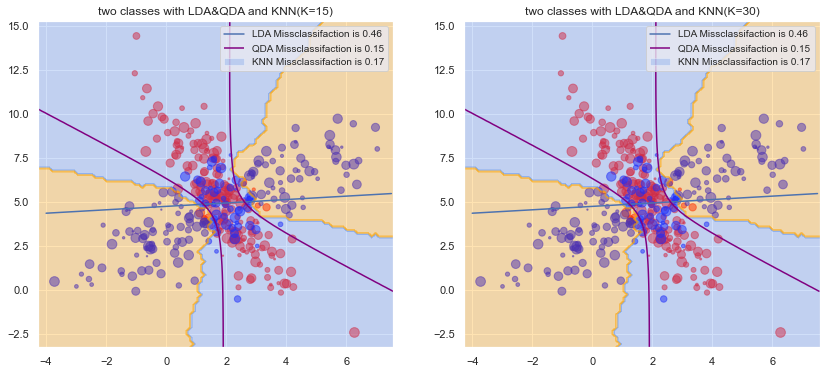

In [591]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
D = np.loadtxt( '/Users/liang/Documents/統計數學與運算/homeworks/hw5_data3.txt')
X = D[:, 0:2]
y = D[:,2]
fig,ax=plt.subplots(1,2,figsize=(14,6),squeeze=False)
area=2*np.random.randint(50,size=D[:,0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
ax[0][0].scatter(D[:, 0], D[:, 1], c = grp_color, s = area, alpha = 0.5, marker = 'o' )#area代表點的的小
ax[0][1].scatter(D[:, 0], D[:, 1], c = grp_color, s = area, alpha = 0.5, marker = 'o' )
#draw LDA
Lda=LinearDiscriminantAnalysis()
Lda.fit(X,y)
trainErrLDA=1-Lda.score(X,y)
print('Training error for LDA ={:.4f}'.format(trainErrLDA))
nx,ny=100,100
x_min,x_max=plt.xlim()
y_min,y_max=plt.ylim()
x_=np.linspace(x_min,x_max,nx)
y_=np.linspace(y_min,y_max,ny)
xx,yy=np.meshgrid(x_,y_)
Z0=Lda.predict_proba(np.c_[xx.ravel(),yy.ravel()])#算出後驗機率
Z0=Z0[:,1].reshape(xx.shape)
# contoursLDA=ax[0][0].contour(xx,yy,Z0,[0.5],colors='g')
# contoursLDA1=ax[0][1].contour(xx,yy,Z0,[0.5],colors='g')
C1, C2 = X[y==0,:], X[y==1,:]
n = D[:,0].size
n1, n2 = C1[:,0].size, C2[:,0].size
pi1, pi2 = n1/n, n2/n
mu1, mu2 = np.mean(C1, axis = 0), np.mean(C2, axis = 0)
Sigma = (np.cov(C1.T) + np.cov(C2.T))/2
#draw classification line of LDA
K = np.log(pi1/pi2) - 0.5 * (mu1 + mu2)  @ LA.inv(Sigma) @ (mu1 - mu2).T
L = LA.inv(Sigma) @ (mu1 - mu2).T
f = lambda x : -L[0]/L[1] * x - K/L[1]
x = np.linspace(-4, 7.5, 10)
b=ax[0][0].plot(x, f(x))
b=ax[0][1].plot(x, f(x))
#draw QDA
Qda = QuadraticDiscriminantAnalysis(\
        tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
trainErrQDA=1-Qda.score(X,y)
print('Training error for QDA ={:.4f}'.format(trainErrQDA))
Z2 = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2[:, 1].reshape(xx.shape)
contoursQDA= ax[0][0].contour(xx, yy, Z2, [0.5],colors = 'purple')
contoursQDA1= ax[0][1].contour(xx, yy, Z2, [0.5],colors = 'purple')
#draw KNN
K = [15,30]
weights = 'uniform'
Knn = neighbors.KNeighborsClassifier(K[0], weights = weights)
Knn = neighbors.KNeighborsClassifier(K[1], weights = weights)
Knn.fit(X, y)
Knn1.fit(X, y)
trainingErrKNN = 1 - Knn.score(X, y)
trainingErrKNN1 = 1 - Knn1.score(X, y)
z1 = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
z10 = Knn1.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = z1.reshape(xx.shape)
Z10 = z10.reshape(xx.shape)
cmap_light =colors.ListedColormap(['cornflowerblue', 'orange'])
contoursKNN=ax[0][0].contourf(xx, yy, Z1, cmap = cmap_light, alpha = 0.3)
contoursKNN1=ax[0][1].contourf(xx, yy, Z10, cmap = cmap_light, alpha = 0.3)
# h1,_=contoursLDA.legend_elements()
h2,_=contoursQDA.legend_elements()
h3,_=contoursKNN.legend_elements()
# h11,_=contoursLDA1.legend_elements()
h22,_=contoursQDA1.legend_elements()
h33,_=contoursKNN1.legend_elements()
ax[0][0].legend([b[0],h2[0],h3[0]],['LDA Missclassifaction is {:.2f}'.format(trainErrLDA),'QDA Missclassifaction is {:.2f}'.format(trainErrQDA),'KNN Missclassifaction is {:.2f}'.format(trainingErrKNN)],fontsize=10)
ax[0][1].legend([b[0],h22[0],h33[0]],['LDA Missclassifaction is {:.2f}'.format(trainErrLDA),'QDA Missclassifaction is {:.2f}'.format(trainErrQDA),'KNN Missclassifaction is {:.2f}'.format(trainingErrKNN1)],fontsize=10)
ax[0][0].set_title("two classes with LDA&QDA and KNN(K=15)")
ax[0][1].set_title("two classes with LDA&QDA and KNN(K=30)")
plt.savefig('/Users/liang/Documents/統計數學與運算/images/hw5gene2.pdf',format='pdf')

In [590]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis  import QuadraticDiscriminantAnalysis
from sklearn import neighbors
import numpy as np
# ... Generate simulated data X, y
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt( '/Users/liang/Documents/統計數學與運算/homeworks/hw5_data3.txt')
X = D[:, 0:2]
y = D[:,2]
K =100
numneighbor=[15,30]
weights = 'uniform'
Lda_trainingError = np.zeros(K)
Lda_testingError = np.zeros(K)
Qda_trainingError = np.zeros(K)
Qda_testingError = np.zeros(K)
Knn_trainingError=np.zeros(K)
Knn_testingError=np.zeros(K)
Knn1_trainingError=np.zeros(K)
Knn1_testingError=np.zeros(K)
Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Knn = neighbors.KNeighborsClassifier(numneighbor[1], weights = weights)
Knn1 = neighbors.KNeighborsClassifier(numneighbor[1], weights = weights) 
for i in range(K) :        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        Lda.fit(X_train, y_train)
        Lda_trainingError[i] = 1-Lda.score(X_train,y_train)
        Lda_testingError[i] =1-Lda.score(X_test,y_test) 
        # print('LDA training Error:{:.4f}'.format(Lda_trainingError[i])) 
        # print('LDA testing Error:{:.4f}'.format(Lda_testingError[i]))   
        Qda.fit(X_train, y_train)
        Qda_trainingError[i] = 1-Qda.score(X_train,y_train)
        Qda_testingError[i] =1-Qda.score(X_test,y_test) 
        Knn.fit(X_train, y_train)
        Knn_trainingError[i] = 1-Knn.score(X_train,y_train)
        Knn_testingError[i] =1-Knn.score(X_test,y_test) 
        Knn1.fit(X_train, y_train)
        Knn1_trainingError[i] = 1-Knn1.score(X_train,y_train)
        Knn1_testingError[i] =1-Knn1.score(X_test,y_test) 
print('LDA mean testing Error:{:.4f}'.format(Lda_testingError.mean()))        
print('LDA mean training Error:{:.4f}'.format(Lda_trainingError.mean()))
print('QDA mean testing Error:{:.4f}'.format(Qda_testingError.mean()))        
print('QDA mean training Error:{:.4f}'.format(Qda_trainingError.mean()))
print('Knn(n=15) mean testing Error:{:.4f}'.format(Knn_testingError.mean()))        
print('Knn(n=15) mean training Error:{:.4f}'.format(Knn_trainingError.mean()))
print('Knn(n=30) mean testing Error:{:.4f}'.format(Knn1_testingError.mean()))        
print('Knn(n=30) mean training Error:{:.4f}'.format(Knn1_trainingError.mean()))

LDA mean testing Error:0.4901
LDA mean training Error:0.4662
QDA mean testing Error:0.1479
QDA mean training Error:0.1411
Knn(n=15) mean testing Error:0.1821
Knn(n=15) mean training Error:0.1681
Knn(n=30) mean testing Error:0.1821
Knn(n=30) mean training Error:0.1681


### 生成的資料3(共變異數小) ###

In [556]:
n1, n2 = 200, 200
m1, m2 = np.array([2, 5]), np.array([2, 5])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[0.5,0 ], [0, 0.5]])
X,y=genmnlrvs(n1,n2,m1,m2,Cov1,Cov2)
np.savetxt('hw5_data310.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y') 

Training error for LDA =0.5125
Training error for QDA =0.3700


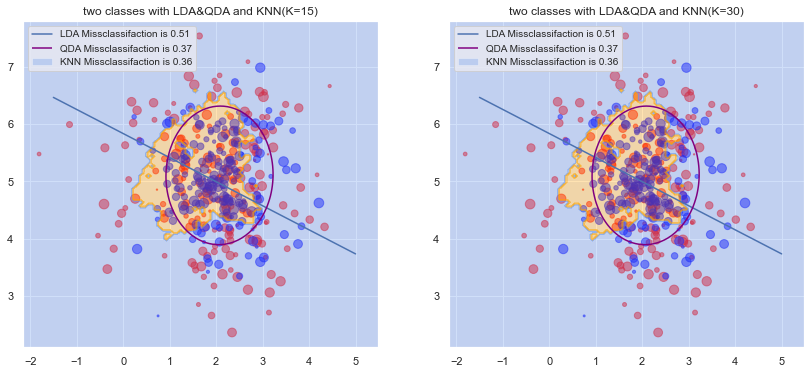

In [592]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
D = np.loadtxt( '/Users/liang/Documents/統計數學與運算/homeworks/hw5_data310.txt')
X = D[:, 0:2]
y = D[:,2]
fig,ax=plt.subplots(1,2,figsize=(14,6),squeeze=False)
area=2*np.random.randint(50,size=D[:,0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
ax[0][0].scatter(D[:, 0], D[:, 1], c = grp_color, s = area, alpha = 0.5, marker = 'o' )#area代表點的的小
ax[0][1].scatter(D[:, 0], D[:, 1], c = grp_color, s = area, alpha = 0.5, marker = 'o' )
#draw LDA
Lda=LinearDiscriminantAnalysis()
Lda.fit(X,y)
trainErrLDA=1-Lda.score(X,y)
print('Training error for LDA ={:.4f}'.format(trainErrLDA))
nx,ny=100,100
x_min,x_max=plt.xlim()
y_min,y_max=plt.ylim()
x_=np.linspace(x_min,x_max,nx)
y_=np.linspace(y_min,y_max,ny)
xx,yy=np.meshgrid(x_,y_)
Z0=Lda.predict_proba(np.c_[xx.ravel(),yy.ravel()])#算出後驗機率
Z0=Z0[:,1].reshape(xx.shape)
# contoursLDA=ax[0][0].contour(xx,yy,Z0,[0.5],colors='g')
# contoursLDA1=ax[0][1].contour(xx,yy,Z0,[0.5],colors='g')
C1, C2 = X[y==0,:], X[y==1,:]
n = D[:,0].size
n1, n2 = C1[:,0].size, C2[:,0].size
pi1, pi2 = n1/n, n2/n
mu1, mu2 = np.mean(C1, axis = 0), np.mean(C2, axis = 0)
Sigma = (np.cov(C1.T) + np.cov(C2.T))/2
#draw classification line of LDA
K = np.log(pi1/pi2) - 0.5 * (mu1 + mu2)  @ LA.inv(Sigma) @ (mu1 - mu2).T
L = LA.inv(Sigma) @ (mu1 - mu2).T
f = lambda x : -L[0]/L[1] * x - K/L[1]
x = np.linspace(-1.5, 5, 10)
b=ax[0][0].plot(x, f(x))
b=ax[0][1].plot(x, f(x))
#draw QDA
Qda = QuadraticDiscriminantAnalysis(\
        tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
trainErrQDA=1-Qda.score(X,y)
print('Training error for QDA ={:.4f}'.format(trainErrQDA))
Z2 = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2[:, 1].reshape(xx.shape)
contoursQDA= ax[0][0].contour(xx, yy, Z2, [0.5],colors = 'purple')
contoursQDA1= ax[0][1].contour(xx, yy, Z2, [0.5],colors = 'purple')
#draw KNN
K = [15,30]
weights = 'uniform'
Knn = neighbors.KNeighborsClassifier(K[0], weights = weights)
Knn = neighbors.KNeighborsClassifier(K[1], weights = weights)
Knn.fit(X, y)
Knn1.fit(X, y)
trainingErrKNN = 1 - Knn.score(X, y)
trainingErrKNN1 = 1 - Knn1.score(X, y)
z1 = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
z10 = Knn1.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = z1.reshape(xx.shape)
Z10 = z10.reshape(xx.shape)
cmap_light =colors.ListedColormap(['cornflowerblue', 'orange'])
contoursKNN=ax[0][0].contourf(xx, yy, Z1, cmap = cmap_light, alpha = 0.3)
contoursKNN1=ax[0][1].contourf(xx, yy, Z10, cmap = cmap_light, alpha = 0.3)
# h1,_=contoursLDA.legend_elements()
h2,_=contoursQDA.legend_elements()
h3,_=contoursKNN.legend_elements()
# h11,_=contoursLDA1.legend_elements()
h22,_=contoursQDA1.legend_elements()
h33,_=contoursKNN1.legend_elements()
ax[0][0].legend([b[0],h2[0],h3[0]],['LDA Missclassifaction is {:.2f}'.format(trainErrLDA),'QDA Missclassifaction is {:.2f}'.format(trainErrQDA),'KNN Missclassifaction is {:.2f}'.format(trainingErrKNN)],fontsize=10)
ax[0][1].legend([b[0],h22[0],h33[0]],['LDA Missclassifaction is {:.2f}'.format(trainErrLDA),'QDA Missclassifaction is {:.2f}'.format(trainErrQDA),'KNN Missclassifaction is {:.2f}'.format(trainingErrKNN1)],fontsize=10)
ax[0][0].set_title("two classes with LDA&QDA and KNN(K=15)")
ax[0][1].set_title("two classes with LDA&QDA and KNN(K=30)")
plt.savefig('/Users/liang/Documents/統計數學與運算/images/hw5gene310.pdf',format='pdf')

In [594]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis  import QuadraticDiscriminantAnalysis
from sklearn import neighbors
import numpy as np
# ... Generate simulated data X, y
data_dir = '/Users/liang/Documents/統計數學與運算/上課教材/ml_data/'
D = np.loadtxt( '/Users/liang/Documents/統計數學與運算/homeworks/hw5_data310.txt')
X = D[:, 0:2]
y = D[:,2]
K =100
numneighbor=[15,30]
weights = 'uniform'
Lda_trainingError = np.zeros(K)
Lda_testingError = np.zeros(K)
Qda_trainingError = np.zeros(K)
Qda_testingError = np.zeros(K)
Knn_trainingError=np.zeros(K)
Knn_testingError=np.zeros(K)
Knn1_trainingError=np.zeros(K)
Knn1_testingError=np.zeros(K)
Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Knn = neighbors.KNeighborsClassifier(numneighbor[1], weights = weights)
Knn1 = neighbors.KNeighborsClassifier(numneighbor[1], weights = weights) 
for i in range(K) :        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        Lda.fit(X_train, y_train)
        Lda_trainingError[i] = 1-Lda.score(X_train,y_train)
        Lda_testingError[i] =1-Lda.score(X_test,y_test) 
        # print('LDA training Error:{:.4f}'.format(Lda_trainingError[i])) 
        # print('LDA testing Error:{:.4f}'.format(Lda_testingError[i]))   
        Qda.fit(X_train, y_train)
        Qda_trainingError[i] = 1-Qda.score(X_train,y_train)
        Qda_testingError[i] =1-Qda.score(X_test,y_test) 
        Knn.fit(X_train, y_train)
        Knn_trainingError[i] = 1-Knn.score(X_train,y_train)
        Knn_testingError[i] =1-Knn.score(X_test,y_test) 
        Knn1.fit(X_train, y_train)
        Knn1_trainingError[i] = 1-Knn1.score(X_train,y_train)
        Knn1_testingError[i] =1-Knn1.score(X_test,y_test) 
print('LDA mean testing Error:{:.4f}'.format(Lda_testingError.mean()))        
print('LDA mean training Error:{:.4f}'.format(Lda_trainingError.mean()))
print('QDA mean testing Error:{:.4f}'.format(Qda_testingError.mean()))        
print('QDA mean training Error:{:.4f}'.format(Qda_trainingError.mean()))
print('Knn(n=15) mean testing Error:{:.4f}'.format(Knn_testingError.mean()))        
print('Knn(n=15) mean training Error:{:.4f}'.format(Knn_trainingError.mean()))
print('Knn(n=30) mean testing Error:{:.4f}'.format(Knn1_testingError.mean()))        
print('Knn(n=30) mean training Error:{:.4f}'.format(Knn1_trainingError.mean()))

LDA mean testing Error:0.5210
LDA mean training Error:0.4775
QDA mean testing Error:0.3816
QDA mean training Error:0.3729
Knn(n=15) mean testing Error:0.3954
Knn(n=15) mean training Error:0.3516
Knn(n=30) mean testing Error:0.3954
Knn(n=30) mean training Error:0.3516


### 三群 ###

三群資料一(中心較分散)

In [613]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis  import QuadraticDiscriminantAnalysis
from sklearn import neighbors
import numpy as np
# ... Generate simulated data X, y
data_dir = '/Users/liang/Documents/Github/'
D = np.loadtxt('/Users/liang/Documents/Github/hw5_dataclass31.txt', comments='#')#讓第一列不要讀進去
X = D[:, 0:2]
y = D[:,2]
K =100
numneighbor=[15,30]
weights = 'uniform'
Lda_trainingError = np.zeros(K)
Lda_testingError = np.zeros(K)
Qda_trainingError = np.zeros(K)
Qda_testingError = np.zeros(K)
Knn_trainingError=np.zeros(K)
Knn_testingError=np.zeros(K)
Knn1_trainingError=np.zeros(K)
Knn1_testingError=np.zeros(K)
Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Knn = neighbors.KNeighborsClassifier(numneighbor[j], weights = weights)   
Knn1 = neighbors.KNeighborsClassifier(numneighbor[j], weights = weights)       
for i in range(K) :        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        Lda.fit(X_train, y_train)
        Lda_trainingError[i] = 1-Lda.score(X_train,y_train)
        Lda_testingError[i] =1-Lda.score(X_test,y_test) 
        # print('LDA training Error:{:.4f}'.format(Lda_trainingError[i])) 
        # print('LDA testing Error:{:.4f}'.format(Lda_testingError[i]))   
        Qda.fit(X_train, y_train)
        Qda_trainingError[i] = 1-Qda.score(X_train,y_train)
        Qda_testingError[i] =1-Qda.score(X_test,y_test) 
        Knn.fit(X_train, y_train)
        Knn_trainingError[i] = 1-Knn.score(X_train,y_train)
        Knn_testingError[i] =1-Knn.score(X_test,y_test) 
        Knn1.fit(X_train, y_train)
        Knn1_trainingError[i] = 1-Knn1.score(X_train,y_train)
        Knn1_testingError[i] =1-Knn1.score(X_test,y_test) 
print('LDA mean testing Error:{:.4f}'.format(Lda_testingError.mean()))        
print('LDA mean training Error:{:.4f}'.format(Lda_trainingError.mean()))
print('QDA mean testing Error:{:.4f}'.format(Qda_testingError.mean()))        
print('QDA mean training Error:{:.4f}'.format(Qda_trainingError.mean()))
print('Knn(n=15) mean testing Error:{:.4f}'.format(Knn_testingError.mean()))        
print('Knn(n=15) mean training Error:{:.4f}'.format(Knn_trainingError.mean()))
print('Knn(n=30) mean testing Error:{:.4f}'.format(Knn1_testingError.mean()))        
print('Knn(n=30) mean training Error:{:.4f}'.format(Knn1_trainingError.mean()))

LDA mean testing Error:0.0643
LDA mean training Error:0.0522
QDA mean testing Error:0.0630
QDA mean training Error:0.0505
Knn(n=15) mean testing Error:0.0667
Knn(n=15) mean training Error:0.0558
Knn(n=30) mean testing Error:0.0667
Knn(n=30) mean training Error:0.0558


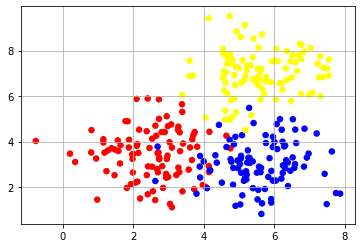

In [265]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
n1, n2, n3 = 100, 100, 100
m1, m2, m3 = np.array([2.5, 3.5]), np.array([5.5,3]),np.array([5.5,7])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0], [0, 1]])
Cov3 = np.array([[1, 0], [0, 1]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
mvn3 = multivariate_normal(mean = m3, cov = Cov3)
A, B,C = mvn1.rvs(n1), mvn2.rvs(n2),mvn3.rvs(n3)
X = np.vstack((A, B, C))
two=np.ones(n3)
for i in np.arange(100):
    two[i]=2
y = np.hstack((np.zeros(n1), np.ones(n2), two))
np.savetxt('/Users/liang/Documents/Github/hw5_dataclass31.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y')
colors = ['red' if i == 0 else 'blue' if i==1 else 'yellow' for i in y]     
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
plt.grid(True)
plt.show()

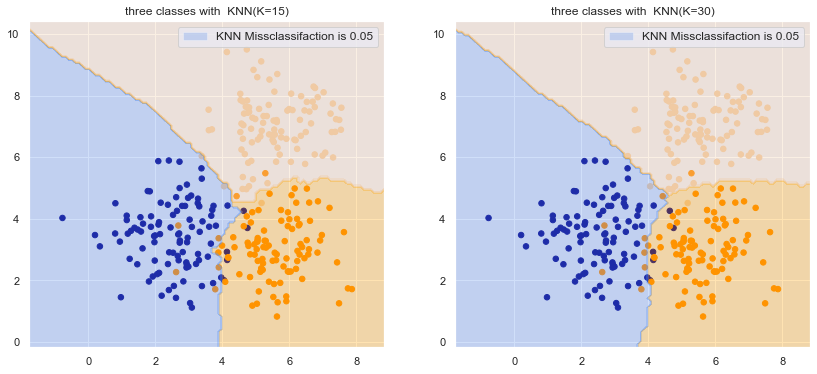

In [638]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
data_dir = '/Users/liang/Documents/Github/'
D = np.loadtxt(data_dir+'hw5_dataclass31.txt', comments='#')#讓第一列不要讀進去
X = D[:, 0:2]
y = D[:,2].astype('int') # convert to integers轉成整數
n = len(y)
# cmap_bold = ['darkblue', 'darkorange','#F0CAA3']
# Group_name = np.array(['Group A', 'Group B','Group C'])
fig,ax=plt.subplots(1,2,figsize=(14,6),squeeze=False)
# sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold, alpha = 0.9, edgecolor = 'black')
colors1 = ['darkblue' if i == 0 else 'darkorange' if i==1 else '#F0CAA3' for i in y]     
ax[0][0].scatter(X[:, 0], X[:, 1], c=colors1, s=30, marker='o')
ax[0][1].scatter(X[:, 0], X[:, 1], c=colors1, s=30, marker='o')
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
#draw LDA
Lda=LinearDiscriminantAnalysis()
Lda.fit(X,y)
intrcp=Lda.intercept_
coeffs=Lda.coef_
trainErrLDA=1-Lda.score(X,y)
ZLDA=Lda.predict_proba(np.c_[xx.ravel(),yy.ravel()])
# ZLDA=ZLDA[:,1].reshape(xx.shape)
# contoursLDA=plt.contour(xx,yy,ZLDA,[0.5],color='#F5F5DC')
ZLDA0 = ZLDA[:, 0].reshape(xx.shape)
ZLDA1 = ZLDA[:, 1].reshape(xx.shape)
ZLDA2 = ZLDA[:, 2].reshape(xx.shape)
# contoursLDA0 = ax[0][0].contour(xx, yy, ZLDA0, [0.5],colors = 'g')
# contoursLDA1 = ax[0][0].contour(xx, yy, ZLDA1, [0.5],colors = 'g')
# contoursLDA2 = ax[0][0].contour(xx, yy, ZLDA2, [0.5],colors = 'g')
# contoursLDA0 = ax[0][1].contour(xx, yy, ZLDA0, [0.5],colors = 'g')
# contoursLDA1 = ax[0][1].contour(xx, yy, ZLDA1, [0.5],colors = 'g')
# contoursLDA2 = ax[0][1].contour(xx, yy, ZLDA2, [0.5],colors = 'g')
#draw QDA
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
trainErrQDA=1-Qda.score(X,y)
Z = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z0 = Z[:, 0].reshape(xx.shape)
Z1 = Z[:, 1].reshape(xx.shape)
Z2 = Z[:, 2].reshape(xx.shape)
# contoursQDA0 = ax[0][0].contour(xx, yy, Z0, [0.5],colors = 'k')
# contoursQDA1 = ax[0][0].contour(xx, yy, Z1, [0.5],colors = 'k')
# contoursQDA2 = ax[0][0].contour(xx, yy, Z2, [0.5],colors = 'k')
# contoursQDA0 = ax[0][1].contour(xx, yy, Z0, [0.5],colors = 'k')
# contoursQDA1 = ax[0][1].contour(xx, yy, Z1, [0.5],colors = 'k')
# contoursQDA2 = ax[0][1].contour(xx, yy, Z2, [0.5],colors = 'k')
#draw KNN
K = [15,30]
weights = 'uniform'
Knn = neighbors.KNeighborsClassifier(K[0], weights = weights)
Knn1 = neighbors.KNeighborsClassifier(K[1], weights = weights)
Knn.fit(X, y)
Knn1.fit(X, y)
trainingErrKNN = 1 - Knn.score(X, y)
trainingErrKNN1 = 1 - Knn1.score(X, y)
z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
zKNN1 = Knn1.predict(np.c_[xx.ravel(), yy.ravel()])
ZZ = z.reshape(xx.shape)
ZZKNN = zKNN1.reshape(xx.shape)
cmap_light =colors.ListedColormap(['cornflowerblue', 'orange','#F0CAA3'])
contoursKNN=ax[0][0].contourf(xx, yy, ZZ, cmap = cmap_light, alpha = 0.3)
contoursKNN1=ax[0][1].contourf(xx, yy, ZZKNN, cmap = cmap_light, alpha = 0.3)
# h1,_=contoursLDA0.legend_elements()
# h2,_=contoursQDA0.legend_elements()
h3,_=contoursKNN.legend_elements()
# h11,_=contoursLDA1.legend_elements()
# h22,_=contoursQDA1.legend_elements()
h33,_=contoursKNN1.legend_elements()
ax[0][0].legend([h3[0]],['KNN Missclassifaction is {:.2f}'.format(trainingErrKNN)],fontsize=12)
ax[0][1].legend([h33[0]],['KNN Missclassifaction is {:.2f}'.format(trainingErrKNN1)],fontsize=12)
ax[0][0].set_title("three classes with  KNN(K=15)")
ax[0][1].set_title("three classes with  KNN(K=30)")
plt.savefig('/Users/liang/Documents/統計數學與運算/images/hw5gene3.pdf',format='pdf')

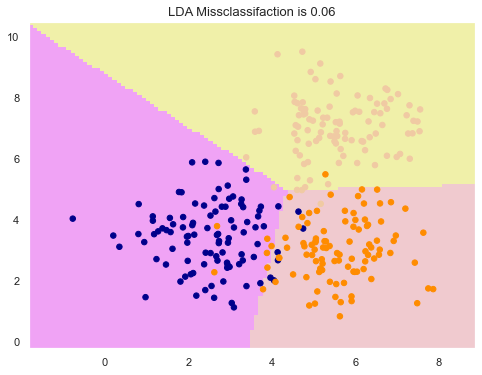

In [637]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
data_dir = '/Users/liang/Documents/Github/'
D = np.loadtxt(data_dir+'hw5_dataclass31.txt', comments='#')#讓第一列不要讀進去
X = D[:, 0:2]
y = D[:,2].astype('int') # convert to integers轉成整數
n = len(y)
# cmap_bold = ['darkblue', 'darkorange','#F0CAA3']
# Group_name = np.array(['Group A', 'Group B','Group C'])
fig,ax=plt.subplots(figsize=(8,6),squeeze=False)
# sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold, alpha = 0.9, edgecolor = 'black')
colors1 = ['darkblue' if i == 0 else 'darkorange' if i==1 else '#F0CAA3' for i in y]     
plt.scatter(X[:, 0], X[:, 1], c=colors1, s=30, marker='o')
# ax[0][1].scatter(X[:, 0], X[:, 1], c=colors1, s=30, marker='o')
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
#draw LDA
Lda=LinearDiscriminantAnalysis()
Lda.fit(X,y)
intrcp=Lda.intercept_
coeffs=Lda.coef_
trainErrLDA=1-Lda.score(X,y)
ZLDA=Lda.predict_proba(np.c_[xx.ravel(),yy.ravel()])
# ZLDA=ZLDA[:,1].reshape(xx.shape)
# contoursLDA=plt.contour(xx,yy,ZLDA,[0.5],color='#F5F5DC')
ZLDA0 = ZLDA[:, 0].reshape(xx.shape)
ZLDA1 = ZLDA[:, 1].reshape(xx.shape)
ZLDA2 = ZLDA[:, 2].reshape(xx.shape)
x1=xx.ravel()
x2=yy.ravel()
cmap=plt.get_cmap('spring')
uu = np.array(  [Lda.predict( np.array([[xx,yy]])) for xx, yy in zip(x1, x2) ] )
U_ = uu.reshape(xx.shape)
plt.pcolormesh(xx, yy,U_, cmap = cmap,\
norm = colors.Normalize(0., 2.),\
shading = "auto", zorder = 0,alpha=0.3)    
plt.title('LDA Missclassifaction is {:.2f}'.format(trainErrLDA),fontsize=13)
plt.savefig('/Users/liang/Documents/統計數學與運算/images/hw5genefinal.pdf',format='pdf')

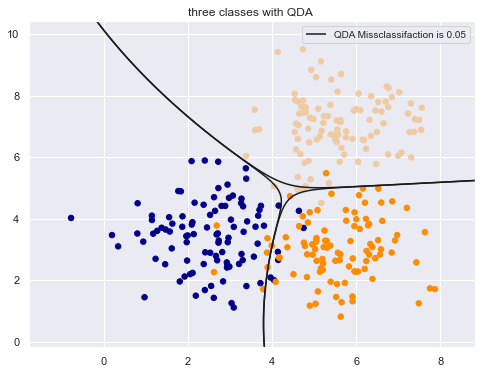

In [607]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
data_dir = '/Users/liang/Documents/Github/'
D = np.loadtxt(data_dir+'hw5_dataclass31.txt', comments='#')#讓第一列不要讀進去
X = D[:, 0:2]
y = D[:,2].astype('int') # convert to integers轉成整數
n = len(y)
# cmap_bold = ['darkblue', 'darkorange','#F0CAA3']
# Group_name = np.array(['Group A', 'Group B','Group C'])
fig,ax=plt.subplots(figsize=(8,6),squeeze=False)
# sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold, alpha = 0.9, edgecolor = 'black')
colors1 = ['darkblue' if i == 0 else 'darkorange' if i==1 else '#F0CAA3' for i in y]     
ax[0][0].scatter(X[:, 0], X[:, 1], c=colors1, s=30, marker='o')
# ax[0][1].scatter(X[:, 0], X[:, 1], c=colors1, s=30, marker='o')
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
#draw LDA
Lda=LinearDiscriminantAnalysis()
Lda.fit(X,y)
intrcp=Lda.intercept_
coeffs=Lda.coef_
trainErrLDA=1-Lda.score(X,y)
ZLDA=Lda.predict_proba(np.c_[xx.ravel(),yy.ravel()])
ZLDA=ZLDA[:,1].reshape(xx.shape)
contoursLDA=plt.contour(xx,yy,ZLDA,[0.5],color='#F5F5DC')
ZLDA0 = ZLDA[:, 0].reshape(xx.shape)
ZLDA1 = ZLDA[:, 1].reshape(xx.shape)
ZLDA2 = ZLDA[:, 2].reshape(xx.shape)

# contoursLDA0 = ax[0][0].contour(xx, yy, ZLDA0, [0.5],colors = 'g')
# contoursLDA1 = ax[0][0].contour(xx, yy, ZLDA1, [0.5],colors = 'g')
# contoursLDA2 = ax[0][0].contour(xx, yy, ZLDA2, [0.5],colors = 'g')
# contoursLDA0 = ax[0][1].contour(xx, yy, ZLDA0, [0.5],colors = 'g')
# contoursLDA1 = ax[0][1].contour(xx, yy, ZLDA1, [0.5],colors = 'g')
# contoursLDA2 = ax[0][1].contour(xx, yy, ZLDA2, [0.5],colors = 'g')
#draw QDA
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
trainErrQDA=1-Qda.score(X,y)
Z = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z0 = Z[:, 0].reshape(xx.shape)
Z1 = Z[:, 1].reshape(xx.shape)
Z2 = Z[:, 2].reshape(xx.shape)
contoursQDA0 = ax[0][0].contour(xx, yy, Z0, [0.5],colors = 'k')
contoursQDA1 = ax[0][0].contour(xx, yy, Z1, [0.5],colors = 'k')
contoursQDA2 = ax[0][0].contour(xx, yy, Z2, [0.5],colors = 'k')
# contoursQDA0 = ax[0][1].contour(xx, yy, Z0, [0.5],colors = 'k')
# contoursQDA1 = ax[0][1].contour(xx, yy, Z1, [0.5],colors = 'k')
# contoursQDA2 = ax[0][1].contour(xx, yy, Z2, [0.5],colors = 'k')
#draw KNN
K = [15,30]
weights = 'uniform'
Knn = neighbors.KNeighborsClassifier(K[0], weights = weights)
Knn1 = neighbors.KNeighborsClassifier(K[1], weights = weights)
Knn.fit(X, y)
Knn1.fit(X, y)
trainingErrKNN = 1 - Knn.score(X, y)
trainingErrKNN1 = 1 - Knn1.score(X, y)
z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
zKNN1 = Knn1.predict(np.c_[xx.ravel(), yy.ravel()])
ZZ = z.reshape(xx.shape)
ZZKNN = zKNN1.reshape(xx.shape)
cmap_light =colors.ListedColormap(['cornflowerblue', 'orange','#F0CAA3'])
# contoursKNN=ax[0][0].contourf(xx, yy, ZZ, cmap = cmap_light, alpha = 0.3)
# contoursKNN1=ax[0][1].contourf(xx, yy, ZZKNN, cmap = cmap_light, alpha = 0.3)
# h1,_=contoursLDA0.legend_elements()
h2,_=contoursQDA0.legend_elements()
# h3,_=contoursKNN.legend_elements()
# h11,_=contoursLDA1.legend_elements()
h22,_=contoursQDA1.legend_elements()
# h33,_=contoursKNN1.legend_elements()
ax[0][0].legend([h2[0]],['QDA Missclassifaction is {:.2f}'.format(trainErrQDA)],fontsize=10)
# ax[0][1].legend([h22[0]],['QDA Missclassifaction is {:.2f}'.format(trainErrQDA)],fontsize=10)
ax[0][0].set_title("three classes with QDA ")
# ax[0][1].set_title("three classes with QDA and KNN(K=30)")
plt.savefig('/Users/liang/Documents/統計數學與運算/images/hw5gene311.pdf',format='pdf')

三群資料二中心較靠近

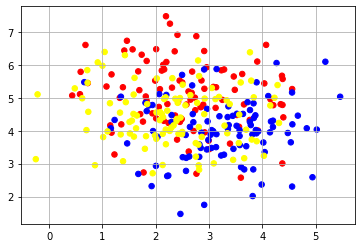

In [266]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
n1, n2, n3 = 100, 100, 100
m1, m2, m3 = np.array([2.7, 5]), np.array([3.2, 4]),np.array([2.3,4.5])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0], [0, 1]])
Cov3 = np.array([[1, 0], [0, 1]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
mvn3 = multivariate_normal(mean = m3, cov = Cov3)
A, B,C = mvn1.rvs(n1), mvn2.rvs(n2),mvn3.rvs(n3)
X = np.vstack((A, B, C))
two=np.ones(n3)
for i in np.arange(100):
    two[i]=2
y = np.hstack((np.zeros(n1), np.ones(n2), two))
np.savetxt('/Users/liang/Documents/Github/hw5_dataclass3.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y')
colors = ['red' if i == 0 else 'blue' if i==1 else 'yellow' for i in y]     
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
plt.grid(True)
plt.show()

LDA Missclassifaction is 0.4200
QDA Missclassifaction is 0.4200


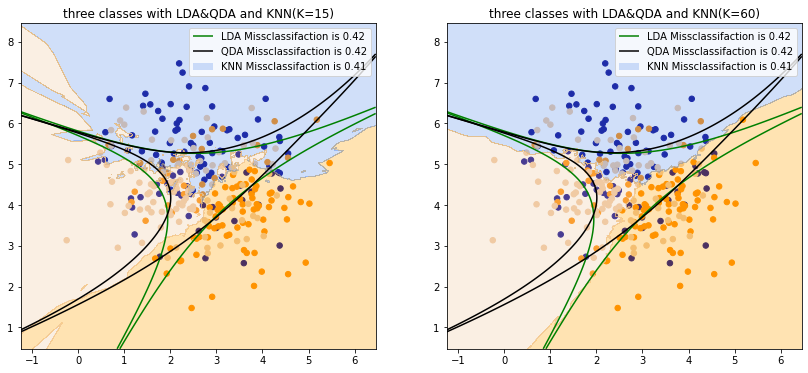

In [331]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
data_dir = '/Users/liang/Documents/Github/'
D = np.loadtxt(data_dir+'hw5_dataclass3.txt', comments='#')#讓第一列不要讀進去
X = D[:, 0:2]
y = D[:,2].astype('int') # convert to integers轉成整數
n = len(y)
cmap_bold = ['darkblue', 'darkorange','#F0CAA3']
Group_name = np.array(['Group A', 'Group B','Group C'])
fig,ax=plt.subplots(1,2,figsize=(14,6),squeeze=False)
# sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold, alpha = 0.9, edgecolor = 'black')
colors1 = ['darkblue' if i == 0 else 'darkorange' if i==1 else '#F0CAA3' for i in y]     
ax[0][0].scatter(X[:, 0], X[:, 1], c=colors1, s=30, marker='o')
ax[0][1].scatter(X[:, 0], X[:, 1], c=colors1, s=30, marker='o')
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.005),np.arange(y_min, y_max, 0.005))
#draw LDA
Lda=LinearDiscriminantAnalysis()
Lda.fit(X,y)
intrcp=Lda.intercept_
coeffs=Lda.coef_
trainErrLDA=1-Lda.score(X,y)
ZLDA=Lda.predict_proba(np.c_[xx.ravel(),yy.ravel()])
# ZLDA=ZLDA[:,1].reshape(xx.shape)
# contoursLDA=plt.contour(xx,yy,ZLDA,[0.5],color='#F5F5DC')
ZLDA0 = ZLDA[:, 0].reshape(xx.shape)
ZLDA1 = ZLDA[:, 1].reshape(xx.shape)
ZLDA2 = ZLDA[:, 2].reshape(xx.shape)
contoursLDA0 = ax[0][0].contour(xx, yy, ZLDA0, [0.5],colors = 'g')
contoursLDA1 = ax[0][0].contour(xx, yy, ZLDA1, [0.5],colors = 'g')
contoursLDA2 = ax[0][0].contour(xx, yy, ZLDA2, [0.5],colors = 'g')
contoursLDA0 = ax[0][1].contour(xx, yy, ZLDA0, [0.5],colors = 'g')
contoursLDA1 = ax[0][1].contour(xx, yy, ZLDA1, [0.5],colors = 'g')
contoursLDA2 = ax[0][1].contour(xx, yy, ZLDA2, [0.5],colors = 'g')
#draw QDA
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
trainErrQDA=1-Qda.score(X,y)
Z = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z0 = Z[:, 0].reshape(xx.shape)
Z1 = Z[:, 1].reshape(xx.shape)
Z2 = Z[:, 2].reshape(xx.shape)
contoursQDA0 = ax[0][0].contour(xx, yy, Z0, [0.5],colors = 'k')
contoursQDA1 = ax[0][0].contour(xx, yy, Z1, [0.5],colors = 'k')
contoursQDA2 = ax[0][0].contour(xx, yy, Z2, [0.5],colors = 'k')
contoursQDA0 = ax[0][1].contour(xx, yy, Z0, [0.5],colors = 'k')
contoursQDA1 = ax[0][1].contour(xx, yy, Z1, [0.5],colors = 'k')
contoursQDA2 = ax[0][1].contour(xx, yy, Z2, [0.5],colors = 'k')
#draw KNN
K = [15,60]
weights = 'uniform'
Knn = neighbors.KNeighborsClassifier(K[0], weights = weights)
Knn1 = neighbors.KNeighborsClassifier(K[1], weights = weights)
Knn.fit(X, y)
Knn1.fit(X, y)
trainingErrKNN = 1 - Knn.score(X, y)
trainingErrKNN1 = 1 - Knn1.score(X, y)
z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
zKNN1 = Knn1.predict(np.c_[xx.ravel(), yy.ravel()])
ZZ = z.reshape(xx.shape)
ZZKNN = zKNN1.reshape(xx.shape)
cmap_light =colors.ListedColormap(['cornflowerblue', 'orange','#F0CAA3'])
contoursKNN=ax[0][0].contourf(xx, yy, ZZ, cmap = cmap_light, alpha = 0.3)
contoursKNN1=ax[0][1].contourf(xx, yy, ZZKNN, cmap = cmap_light, alpha = 0.3)
h1,_=contoursLDA0.legend_elements()
h2,_=contoursQDA0.legend_elements()
h3,_=contoursKNN.legend_elements()
h11,_=contoursLDA1.legend_elements()
h22,_=contoursQDA1.legend_elements()
h33,_=contoursKNN1.legend_elements()
ax[0][0].legend([h1[0],h2[0],h3[0]],['LDA Missclassifaction is {:.2f}'.format(trainErrLDA),'QDA Missclassifaction is {:.2f}'.format(trainErrQDA),'KNN Missclassifaction is {:.2f}'.format(trainingErrKNN)],fontsize=10)
ax[0][1].legend([h11[0],h22[0],h33[0]],['LDA Missclassifaction is {:.2f}'.format(trainErrLDA),'QDA Missclassifaction is {:.2f}'.format(trainErrQDA),'KNN Missclassifaction is {:.2f}'.format(trainingErrKNN1)],fontsize=10)
ax[0][0].set_title("three classes with LDA&QDA and KNN(K=15)")
ax[0][1].set_title("three classes with LDA&QDA and KNN(K=60)")
plt.savefig('/Users/liang/Documents/統計數學與運算/images/hw5gene32.pdf',format='pdf')
print('LDA Missclassifaction is {:.4f}'.format(trainErrLDA))
print('QDA Missclassifaction is {:.4f}'.format(trainErrQDA))

In [329]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis  import QuadraticDiscriminantAnalysis
from sklearn import neighbors
import numpy as np
# ... Generate simulated data X, y
data_dir = '/Users/liang/Documents/Github/'
D = np.loadtxt(data_dir+'hw5_dataclass3.txt', comments='#')#讓第一列不要讀進去
X = D[:, 0:2]
y = D[:,2]
K =100
numneighbor=[15,30]
weights = 'uniform'
Lda_trainingError = np.zeros(K)
Lda_testingError = np.zeros(K)
Qda_trainingError = np.zeros(K)
Qda_testingError = np.zeros(K)
Knn_trainingError=np.zeros(K)
Knn_testingError=np.zeros(K)
Knn1_trainingError=np.zeros(K)
Knn1_testingError=np.zeros(K)
Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Knn = neighbors.KNeighborsClassifier(numneighbor[0], weights = weights)    
Knn1 = neighbors.KNeighborsClassifier(numneighbor[1], weights = weights)       
for i in range(K) :        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        Lda.fit(X_train, y_train)
        Lda_trainingError[i] = 1-Lda.score(X_train,y_train)
        Lda_testingError[i] =1-Lda.score(X_test,y_test) 
        # print('LDA training Error:{:.4f}'.format(Lda_trainingError[i])) 
        # print('LDA testing Error:{:.4f}'.format(Lda_testingError[i]))   
        Qda.fit(X_train, y_train)
        Qda_trainingError[i] = 1-Qda.score(X_train,y_train)
        Qda_testingError[i] =1-Qda.score(X_test,y_test) 
        Knn.fit(X_train, y_train)
        Knn_trainingError[i] = 1-Knn.score(X_train,y_train)
        Knn_testingError[i] =1-Knn.score(X_test,y_test) 
        Knn1.fit(X_train, y_train)
        Knn1_trainingError[i] = 1-Knn1.score(X_train,y_train)
        Knn1_testingError[i] =1-Knn1.score(X_test,y_test)
print('LDA mean testing Error:{:.4f}'.format(Lda_testingError.mean()))        
print('LDA mean training Error:{:.4f}'.format(Lda_trainingError.mean()))
print('QDA mean testing Error:{:.4f}'.format(Qda_testingError.mean()))        
print('QDA mean training Error:{:.4f}'.format(Qda_trainingError.mean()))
print('Knn(n=15) mean testing Error:{:.4f}'.format(Knn_testingError.mean()))        
print('Knn(n=15) mean training Error:{:.4f}'.format(Knn_trainingError.mean()))
print('Knn(n=30) mean testing Error:{:.4f}'.format(Knn1_testingError.mean()))        
print('Knn(n=30) mean training Error:{:.4f}'.format(Knn1_trainingError.mean()))

LDA mean testing Error:0.4313
LDA mean training Error:0.4188
QDA mean testing Error:0.4372
QDA mean training Error:0.4218
Knn(n=15) mean testing Error:0.4603
Knn(n=15) mean training Error:0.4138
Knn(n=30) mean testing Error:0.4443
Knn(n=30) mean training Error:0.4208


三群（變數不同）

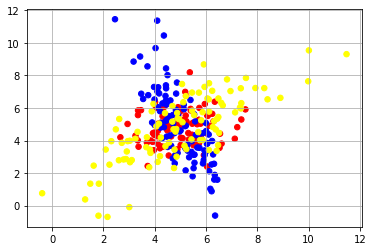

In [325]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
n1, n2, n3 = 100, 100, 100
m1, m2, m3 = np.array([5, 5]), np.array([5, 5]),np.array([5,5])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, -2], [-2, 6]])
Cov3 = np.array([[5, 4], [4, 5]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
mvn3 = multivariate_normal(mean = m3, cov = Cov3)
A, B,C = mvn1.rvs(n1), mvn2.rvs(n2),mvn3.rvs(n3)
X = np.vstack((A, B, C))
two=np.ones(n3)
for i in np.arange(100):
    two[i]=2
y = np.hstack((np.zeros(n1), np.ones(n2), two))
np.savetxt('/Users/liang/Documents/Github/hw5_dataclass4.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y')
colors = ['red' if i == 0 else 'blue' if i==1 else 'yellow' for i in y]     
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
plt.grid(True)
plt.show()

/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_32340/1399927373.py:35: UserWarning: No contour levels were found within the data range.
  contoursLDA0 = ax[0][0].contour(xx, yy, ZLDA0, [0.5],colors = 'g')
/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_32340/1399927373.py:36: UserWarning: No contour levels were found within the data range.
  contoursLDA1 = ax[0][0].contour(xx, yy, ZLDA1, [0.5],colors = 'g')
/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_32340/1399927373.py:37: UserWarning: No contour levels were found within the data range.
  contoursLDA2 = ax[0][0].contour(xx, yy, ZLDA2, [0.5],colors = 'g')
/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_32340/1399927373.py:38: UserWarning: No contour levels were found within the data range.
  contoursLDA0 = ax[0][1].contour(xx, yy, ZLDA0, [0.5],colors = 'g')
/var/folders/bt/lzds7c0956d278lsqrjn3ql00000gn/T/ipykernel_32340/1399927373.py:39: UserWarning: No contour levels were found within 

Text(0.5, 1.0, 'two classes with LDA&QDA and KNN(K=60)')

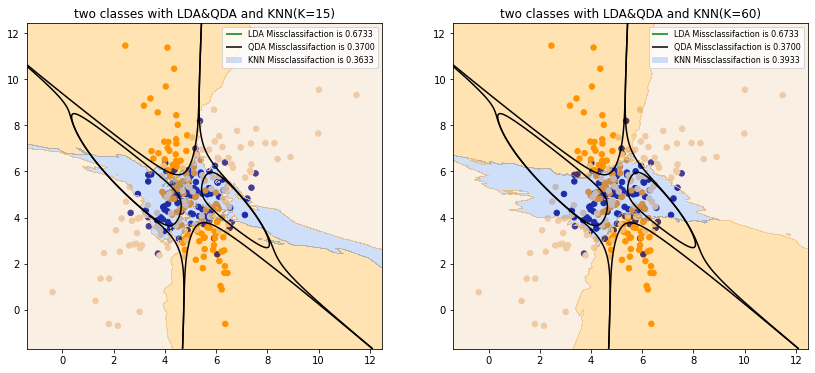

In [327]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
data_dir = '/Users/liang/Documents/Github/'
D = np.loadtxt(data_dir+'hw5_dataclass4.txt', comments='#')#讓第一列不要讀進去
X = D[:, 0:2]
y = D[:,2].astype('int') # convert to integers轉成整數
n = len(y)
cmap_bold = ['darkblue', 'darkorange','#F0CAA3']
Group_name = np.array(['Group A', 'Group B','Group C'])
fig,ax=plt.subplots(1,2,figsize=(14,6),squeeze=False)
# sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold, alpha = 0.9, edgecolor = 'black')
colors1 = ['darkblue' if i == 0 else 'darkorange' if i==1 else '#F0CAA3' for i in y]     
ax[0][0].scatter(X[:, 0], X[:, 1], c=colors1, s=30, marker='o')
ax[0][1].scatter(X[:, 0], X[:, 1], c=colors1, s=30, marker='o')
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.005),np.arange(y_min, y_max, 0.005))
#draw LDA
Lda=LinearDiscriminantAnalysis()
Lda.fit(X,y)
intrcp=Lda.intercept_
coeffs=Lda.coef_
trainErrLDA=1-Lda.score(X,y)
ZLDA=Lda.predict_proba(np.c_[xx.ravel(),yy.ravel()])
# ZLDA=ZLDA[:,1].reshape(xx.shape)
# contoursLDA=plt.contour(xx,yy,ZLDA,[0.5],color='#F5F5DC')
ZLDA0 = ZLDA[:, 0].reshape(xx.shape)
ZLDA1 = ZLDA[:, 1].reshape(xx.shape)
ZLDA2 = ZLDA[:, 2].reshape(xx.shape)
contoursLDA0 = ax[0][0].contour(xx, yy, ZLDA0, [0.5],colors = 'g')
contoursLDA1 = ax[0][0].contour(xx, yy, ZLDA1, [0.5],colors = 'g')
contoursLDA2 = ax[0][0].contour(xx, yy, ZLDA2, [0.5],colors = 'g')
contoursLDA0 = ax[0][1].contour(xx, yy, ZLDA0, [0.5],colors = 'g')
contoursLDA1 = ax[0][1].contour(xx, yy, ZLDA1, [0.5],colors = 'g')
contoursLDA2 = ax[0][1].contour(xx, yy, ZLDA2, [0.5],colors = 'g')
#draw QDA
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
trainErrQDA=1-Qda.score(X,y)
Z = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z0 = Z[:, 0].reshape(xx.shape)
Z1 = Z[:, 1].reshape(xx.shape)
Z2 = Z[:, 2].reshape(xx.shape)
contoursQDA0 = ax[0][0].contour(xx, yy, Z0, [0.5],colors = 'k')
contoursQDA1 = ax[0][0].contour(xx, yy, Z1, [0.5],colors = 'k')
contoursQDA2 = ax[0][0].contour(xx, yy, Z2, [0.5],colors = 'k')
contoursQDA0 = ax[0][1].contour(xx, yy, Z0, [0.5],colors = 'k')
contoursQDA1 = ax[0][1].contour(xx, yy, Z1, [0.5],colors = 'k')
contoursQDA2 = ax[0][1].contour(xx, yy, Z2, [0.5],colors = 'k')
#draw KNN
K = [15,60]
weights = 'uniform'
Knn = neighbors.KNeighborsClassifier(K[0], weights = weights)
Knn1 = neighbors.KNeighborsClassifier(K[1], weights = weights)
Knn.fit(X, y)
Knn1.fit(X, y)
trainingErrKNN = 1 - Knn.score(X, y)
trainingErrKNN1 = 1 - Knn1.score(X, y)
z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
zKNN1 = Knn1.predict(np.c_[xx.ravel(), yy.ravel()])
ZZ = z.reshape(xx.shape)
ZZKNN = zKNN1.reshape(xx.shape)
cmap_light =colors.ListedColormap(['cornflowerblue', 'orange','#F0CAA3'])
contoursKNN=ax[0][0].contourf(xx, yy, ZZ, cmap = cmap_light, alpha = 0.3)
contoursKNN1=ax[0][1].contourf(xx, yy, ZZKNN, cmap = cmap_light, alpha = 0.3)
h1,_=contoursLDA0.legend_elements()
h2,_=contoursQDA0.legend_elements()
h3,_=contoursKNN.legend_elements()
h11,_=contoursLDA1.legend_elements()
h22,_=contoursQDA1.legend_elements()
h33,_=contoursKNN1.legend_elements()
ax[0][0].legend([h1[0],h2[0],h3[0]],['LDA Missclassifaction is {:.4f}'.format(trainErrLDA),'QDA Missclassifaction is {:.4f}'.format(trainErrQDA),'KNN Missclassifaction is {:.4f}'.format(trainingErrKNN)],fontsize=8)
ax[0][1].legend([h11[0],h22[0],h33[0]],['LDA Missclassifaction is {:.4f}'.format(trainErrLDA),'QDA Missclassifaction is {:.4f}'.format(trainErrQDA),'KNN Missclassifaction is {:.4f}'.format(trainingErrKNN1)],fontsize=8)
ax[0][0].set_title("two classes with LDA&QDA and KNN(K=15)")
ax[0][1].set_title("two classes with LDA&QDA and KNN(K=60)")